# 50 Startups Profit Prediction model by Saquib Ayubi 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sweetviz as sv 
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#load Dataset
strt=pd.read_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\50_Startups.csv")
strt.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#pip install openpyxl

In [4]:
strt.info() #here we can see there are no null Values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


RD_Spend              AxesSubplot(0.125,0.653529;0.227941x0.226471)
Administration     AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Marketing_Spend    AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Profit                AxesSubplot(0.125,0.381765;0.227941x0.226471)
dtype: object

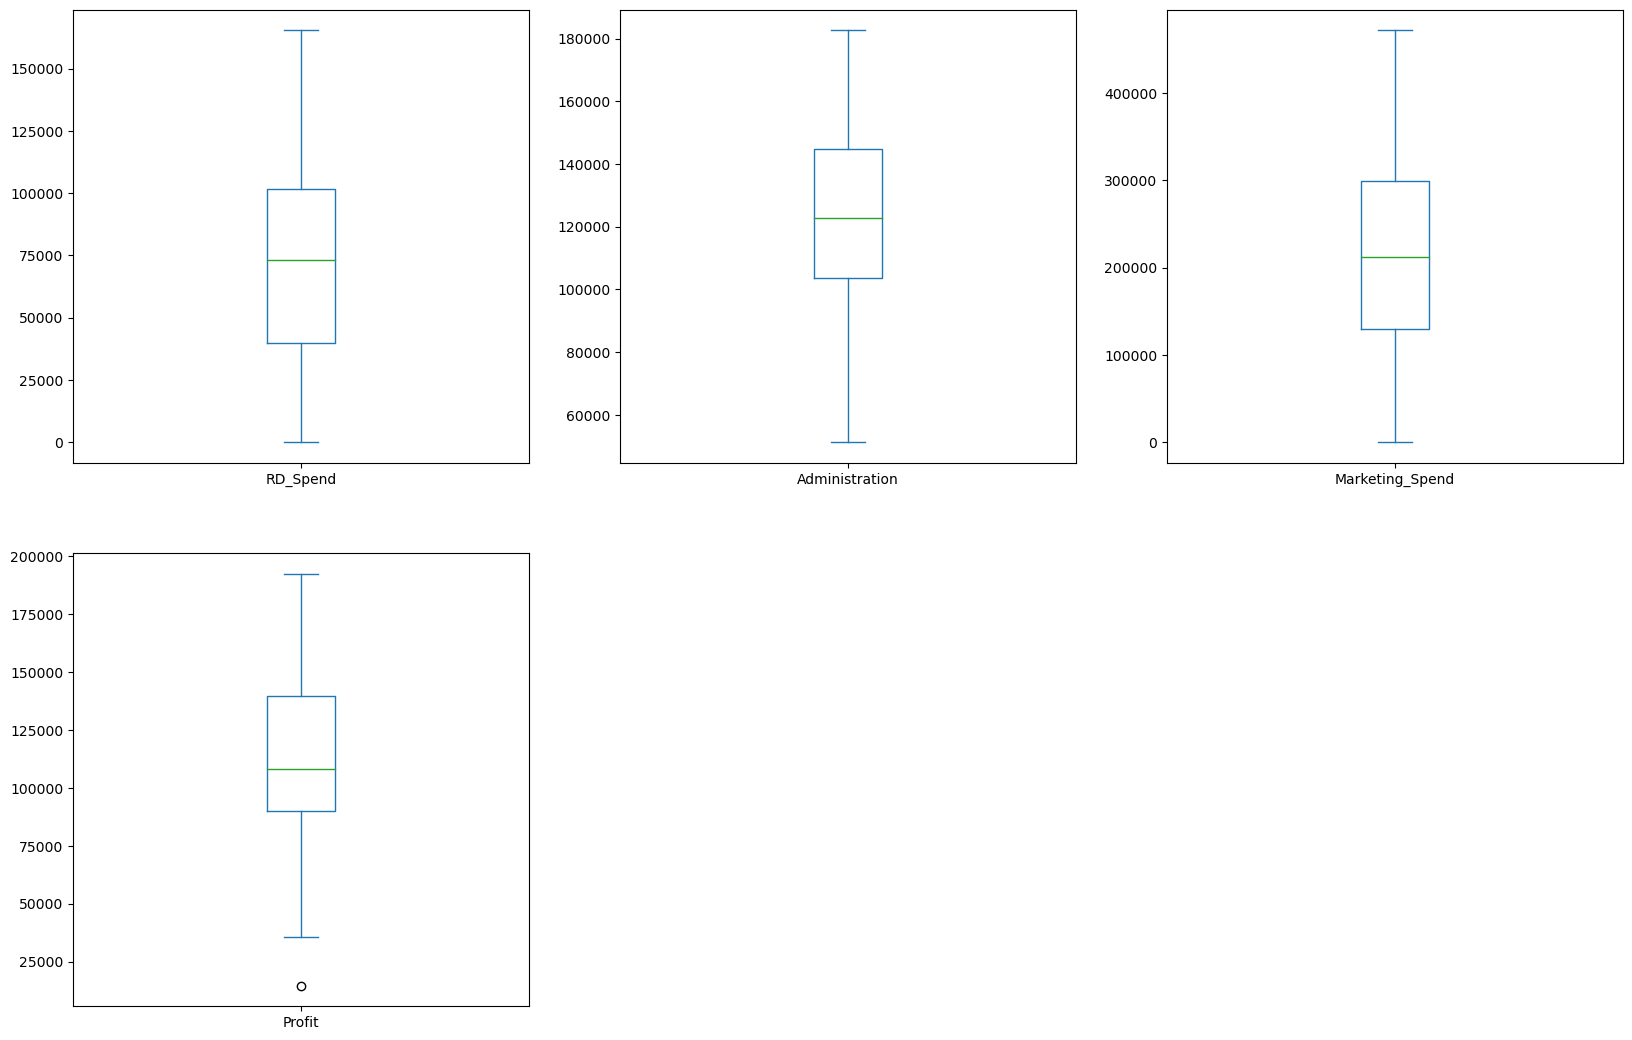

In [5]:
strt.plot(kind='box',subplots=True, layout=(3,3),figsize=(20,20)) #Subplots of all the colmns Showing Boxplots with no outliers in each column

In [6]:
strt.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#Label Encoding State Column from String Value to assigning Numerical value for each unique string
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
strt["State"]=le.fit_transform(strt["State"])
strt.head()


,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [8]:
#Normalizing Dataset ranging from (1,2) only as the BOX-COX transformation takes only Positive Values to transform
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(1,2))
d=scaler.fit_transform(strt)
strt1=pd.DataFrame(d,columns=strt.columns)
strt1.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,2.000000,1.651744,2.000000,2.0,2.000000
1,1.983359,1.761972,1.940893,1.0,1.997355
2,1.927985,1.379579,1.864664,1.5,1.993178
3,1.873136,1.512998,1.812235,2.0,1.947292
4,1.859438,1.305328,1.776136,1.5,1.853171


In [9]:
strt1.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,2.000000,1.651744,2.000000,2.0,2.000000
1,1.983359,1.761972,1.940893,1.0,1.997355
2,1.927985,1.379579,1.864664,1.5,1.993178
3,1.873136,1.512998,1.812235,2.0,1.947292
4,1.859438,1.305328,1.776136,1.5,1.853171


In [10]:
#Trying to remove outliers based on Z scores and removing the datapoints which are above Zscore=3 
from scipy import stats
zsc=stats.zscore(strt1)

In [11]:
#Making all values absolute to make -ve alues to +ve so that we can easily remove the Zscores above 3
zscores=np.abs(zsc)

In [12]:
filter_zscores=(zscores<3).all(axis=1)

In [13]:
filtered=strt1[filter_zscores]

In [14]:
strt1.shape #comparing shapes of both original and Zscore Filtered dataset

(50, 5)

In [15]:
filtered.shape #seems like there are no outliers as we can see after transforming df and trying to eliminate the zvalues above 3 and below -3 no row got eliminated 

(50, 5)

In [16]:
#Lets Try Isolation Forest method for Outlier Detection
#clf=IsolationForest(random_state=20,contamination=0.05) #based on domain knowledge the contamination value should be set
#clf.fit(strt1)
#strt1['scores']=clf.decision_function(strt1)
#strt1['anamoly']=clf.predict(strt1)
#strt1

In [17]:
#Checking for Correlation Between Columns
strt1.corr() #we can observe that there is no multicollinearity problem between the independent variables

,RD_Spend,Administration,Marketing_Spend,State,Profit
RD_Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


<AxesSubplot:>

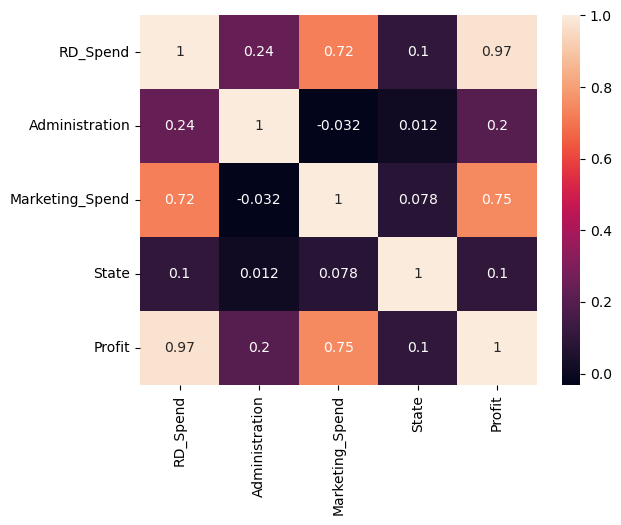

In [18]:
sns.heatmap(strt1.corr(),annot=True)
#we can consider multicollinearity prob when correlation 'r' value is above 0.75 its nominal to consider for multicollinearity

In [19]:
sweet_report=sv.analyze(strt1)
sweet_report.show_html('EDA_of_50Startups.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_of_50Startups.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
#here had to change the column name as the code was showing error because the smf.ols was treating R as separate in R&D_Spend column
strt1.rename(columns={'R&D Spend':'RD_Spend'}, inplace=True)
strt1.rename(columns={'Marketing Spend':'Marketing_Spend'},inplace=True)
strt1.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,2.000000,1.651744,2.000000,2.0,2.000000
1,1.983359,1.761972,1.940893,1.0,1.997355
2,1.927985,1.379579,1.864664,1.5,1.993178
3,1.873136,1.512998,1.812235,2.0,1.947292
4,1.859438,1.305328,1.776136,1.5,1.853171


# Model1 Creation 

In [21]:
model= smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=strt1).fit()


In [22]:
model.params

Intercept          0.389441
RD_Spend           0.750261
Administration    -0.019844
Marketing_Spend    0.072337
State             -0.000251
dtype: float64

In [23]:
model.tvalues, '\n', model.pvalues

(Intercept           5.236532
 RD_Spend           17.608621
 Administration     -0.519906
 Marketing_Spend     1.636966
 State              -0.013865
 dtype: float64,
 '\n',
 Intercept          4.169039e-06
 RD_Spend           8.249206e-22
 Administration     6.056771e-01
 Marketing_Spend    1.086131e-01
 State              9.889988e-01
 dtype: float64)

In [24]:
# RMSE- Root Mean Squared Error
from sklearn.metrics import mean_squared_error
import math
mse_m1= mean_squared_error(strt1.Profit,model.fittedvalues) #checking for RMSE value 
rmse_m1=math.sqrt(mse_m1)
print("the difference between actual and predicted values of model1 is :---",rmse_m1)

the difference between actual and predicted values of model1 is :--- 0.049866562288000474


# Model2 creation by removing only State column and retaining Administration,Marketing Spend column 

### even though all three columns p_value is greater than 0.05, hence accepting H0 Hypothesis- (there is no dependency btw the variables)& rejecting Ha that (there is relationship btw the variables) removing columns 1 by 1 to check the impact of columns with and without independent columns

In [25]:
#lets build model2 only on RD_SPend,ADministration,Marketing_Spend
model2=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=strt1).fit()

In [26]:
model2.params

Intercept          0.389111
RD_Spend           0.750220
Administration    -0.019837
Marketing_Spend    0.072338
dtype: float64

In [27]:
model2.tvalues, '\n',model2.pvalues 

(Intercept           5.583037
 RD_Spend           17.846374
 Administration     -0.525507
 Marketing_Spend     1.655077
 dtype: float64,
 '\n',
 Intercept          1.215184e-06
 RD_Spend           2.634968e-22
 Administration     6.017551e-01
 Marketing_Spend    1.047168e-01
 dtype: float64)

In [28]:
mse_m2= mean_squared_error(strt1.Profit,model2.fittedvalues) #checking for RMSE value 
rmse_m2=math.sqrt(mse_m2)
print("the difference between actual and predicted values of model2 is :---",rmse_m2)

the difference between actual and predicted values of model2 is :--- 0.04986666880475023


# Model3 Creation by removing Administraion column and Retaining Marketing_Spend column ,although RD_Spend column has 97% correlation with Profit

In [29]:
#Let us build model3 by excluding Administration
model3=smf.ols('Profit~Marketing_Spend+RD_Spend',data=strt1).fit()

In [30]:
model3.params

Intercept          0.360683
Marketing_Spend    0.079457
RD_Spend           0.741718
dtype: float64

In [31]:
model3.tvalues,'\n', model3.pvalues

(Intercept           8.271782
 Marketing_Spend     1.927052
 RD_Spend           19.265555
 dtype: float64,
 '\n',
 Intercept          1.003956e-10
 Marketing_Spend    6.003040e-02
 RD_Spend           6.040433e-24
 dtype: float64)

In [32]:
model3.rsquared,model2.rsquared,model.rsquared
#we can see that after removing insignificant columns (Administration,State) the model's accuracy(R2 value) has barely changed

(0.9504503015559763, 0.9507459940683247, 0.9507462044842657)

In [33]:
#Residual plots for Homoscedasticity
def get_standardized_values (vals):
    return (vals-vals.mean())/vals.std()

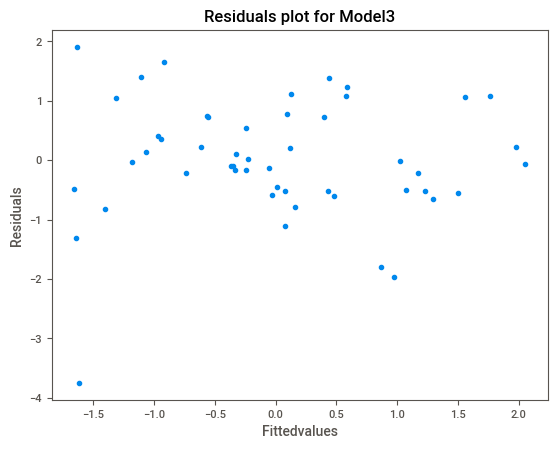

In [34]:
plt.scatter(get_standardized_values(model3.fittedvalues),
           get_standardized_values(model3.resid))
plt.title('Residuals plot for Model3')
plt.xlabel('Fittedvalues')
plt.ylabel('Residuals')
plt.show()


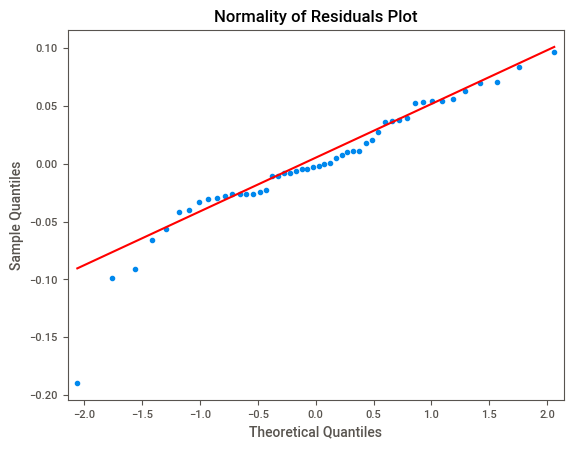

In [35]:
#Quantile-Quantile plot 
qqplot=sm.qqplot(model3.resid,line='q')
plt.title('Normality of Residuals Plot')
plt.show()


eval_env: 1


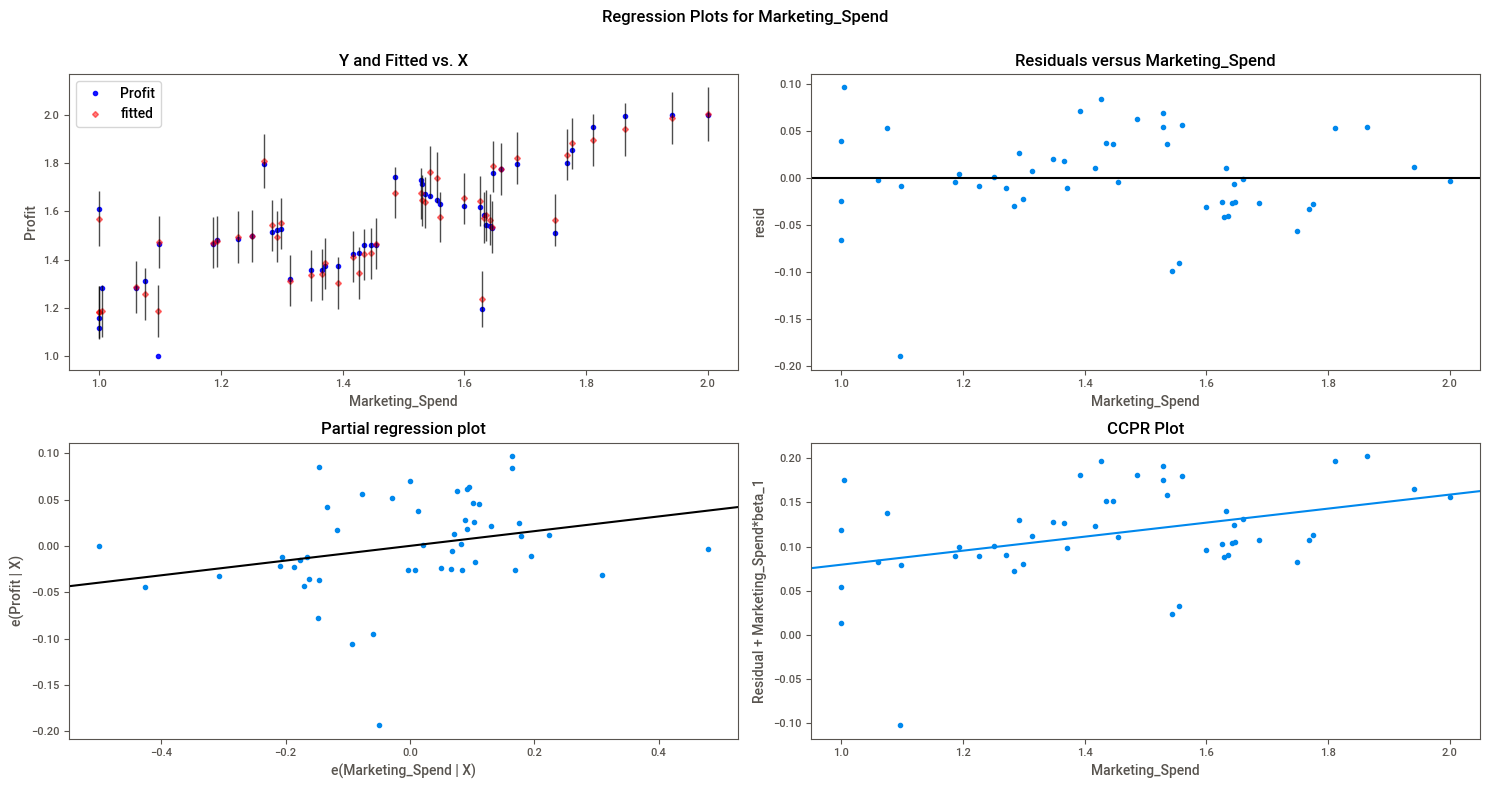

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model3,'Marketing_Spend',fig=fig)
plt.show()

eval_env: 1


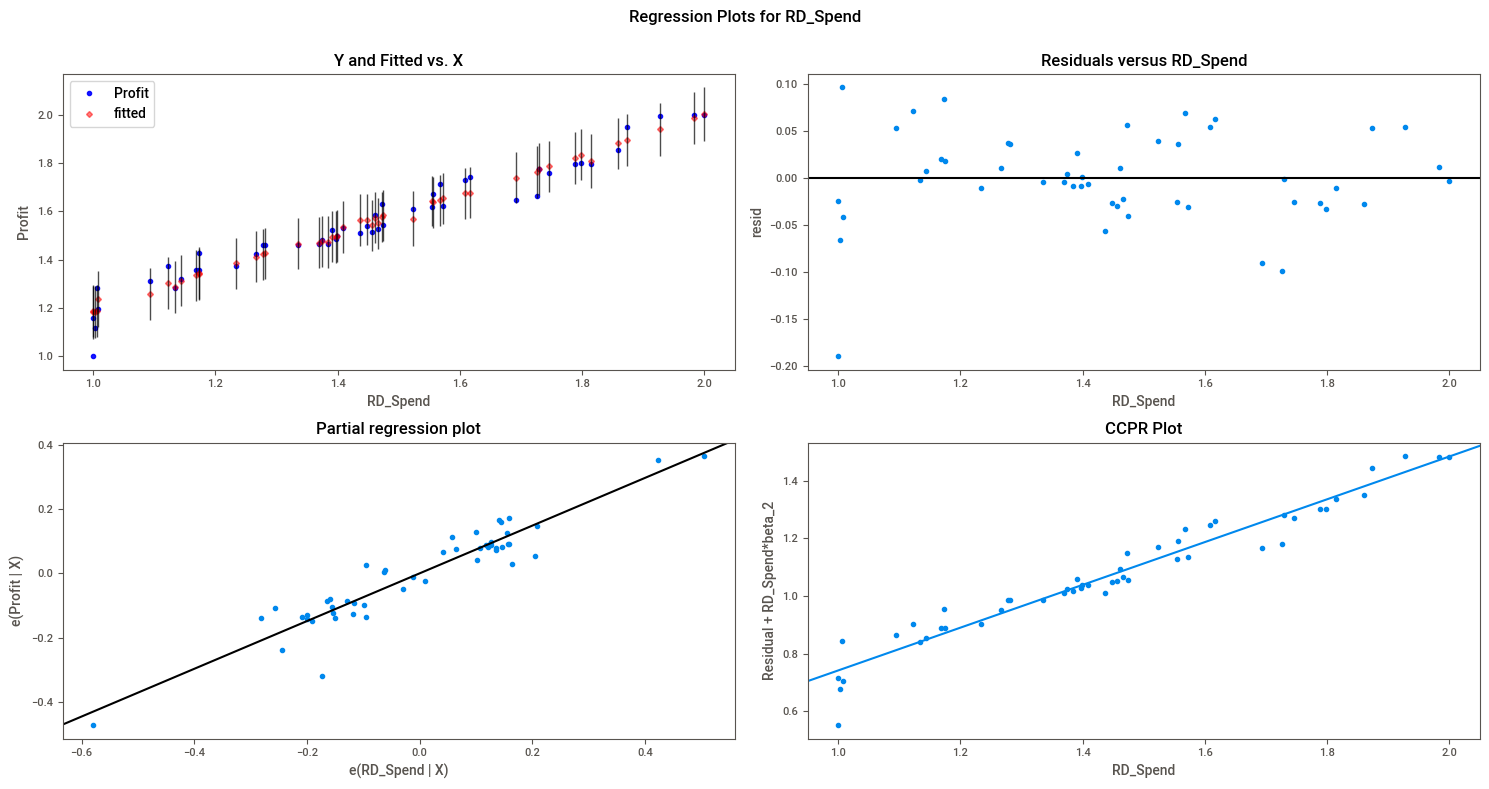

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model3,'RD_Spend',fig=fig)
plt.show()

In [38]:
#Cook's Distance to find Datapoints affecting the model
model_influence=model3.get_influence()
(c,_)=model_influence.cooks_distance
summary_cooks=model_influence.summary_frame()
summary_cooks.head()

,dfb_Intercept,dfb_Marketing_Spend,dfb_RD_Spend,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.019238,-0.009419,-0.006199,0.000182,-0.062732,0.121552,-0.023335,-0.062064,-0.023087
1,-0.064955,0.025396,0.028182,0.002177,0.233079,0.107323,0.080817,0.230720,0.079999
2,-0.262517,0.084367,0.136613,0.038503,1.101790,0.086885,0.339866,1.104361,0.340659
3,-0.219439,0.067708,0.119968,0.029739,1.072052,0.072037,0.298694,1.073796,0.299180
4,0.103889,-0.022536,-0.067850,0.007439,-0.558187,0.066841,-0.149390,-0.554057,-0.148285


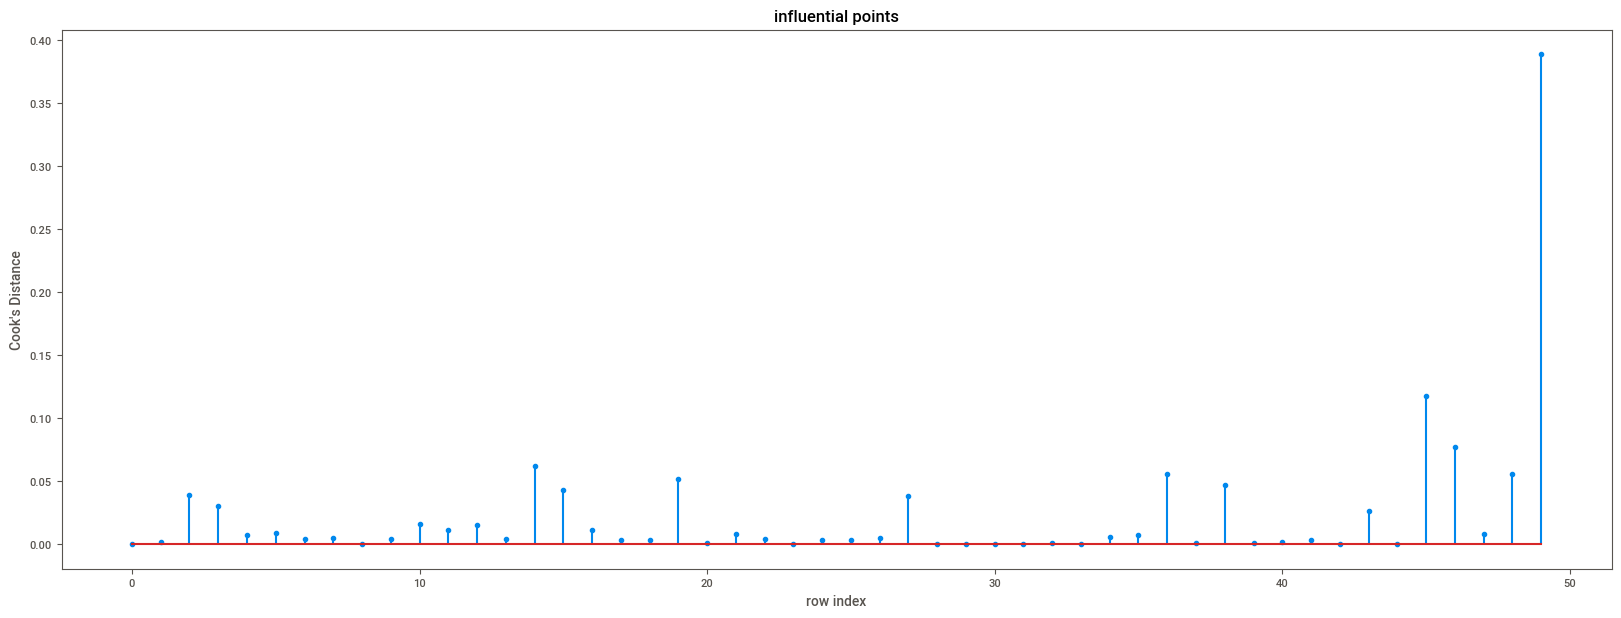

In [39]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(strt1)),np.round(c,3))
plt.title("influential points")
plt.xlabel("row index")
plt.ylabel("Cook's Distance")
plt.show()

### cook's Distance = 4/N where N is no.of records 4/50=0.08 every datapoint above 0.08 should be considered High Influential point

In [40]:
np.argmax(c),np.max(c) #here record no.49 is the highest influential datapoint we can check the datapoint and remove it or replace or retain it accordimg to Domain Knowledge

(49, 0.3894886227924928)

In [41]:
mse_m3= mean_squared_error(strt1.Profit,model3.fittedvalues) #checking for RMSE value 
rmse_m3=math.sqrt(mse_m3)
print("the difference between actual and predicted values of model3 is :---",rmse_m3)

the difference between actual and predicted values of model3 is :--- 0.05001613011326285


In [42]:
#Total Summary of Model3
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.16e-31
Time:                        02:24:29   Log-Likelihood:                 78.824
No. Observations:                  50   AIC:                            -151.6
Df Residuals:                      47   BIC:                            -145.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3607      0.044      8.272      0.000       0.273       0.448
Marketing_Spend     0.0795      0.041      1.927      0.060      -0.003       0.162
RD_Spend            0.7417      0.038     19.266      0.000       0.664       0.819
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#!pip install lazypredict

## Lets see which Linear Regression Algorithm best fits with this dataset using LazyPredict module which helps to check all algorithms wih their speed,rmse_value, r_squared and Adjusted RSquared

In [44]:
from lazypredict.Supervised import LazyRegressor 

In [45]:
strt.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [46]:
X=strt1.iloc[:,:-1]
Y=strt1.iloc[:,-1:]
Y.head()

,Profit
0,2.00
1,2.00
2,1.99
3,1.95
4,1.85


In [47]:
#using Train_Test_Split for Validation of the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.33,random_state=9)


In [48]:
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_absolute_error

In [49]:
reg=LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions= reg.fit(x_train,x_test,y_train,y_test)
print(models)

100%|██████████| 42/42 [00:01<00:00, 28.66it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ElasticNetCV                                 0.92       0.94  0.05        0.08
LassoLarsCV                                  0.91       0.94  0.05        0.02
LarsCV                                       0.91       0.94  0.05        0.02
LassoCV                                      0.91       0.94  0.05        0.08
LassoLarsIC                                  0.91       0.93  0.05        0.01
Ridge                                        0.91       0.93  0.05        0.02
LinearSVR                                    0.91       0.93  0.05        0.01
BaggingRegressor                             0.91       0.93  0.06        0.02
BayesianRidge                                0.90       0.93  0.06        0.02
HuberRegressor                               0.90       0.93  0.06        0.03
RidgeCV                                      0.90   

### Here we can see that ElasticNetCV algorithm gave the best R_squared=0.92, adj_Rsquared=0.94 , RMSE value=0.05 and less time=0.07secs

In [50]:
#Cross Validation of all Models we can see ElasticNetCV has given best model
print(predictions)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ElasticNetCV                                 0.92       0.94  0.05        0.08
LassoLarsCV                                  0.91       0.94  0.05        0.02
LarsCV                                       0.91       0.94  0.05        0.02
LassoCV                                      0.91       0.94  0.05        0.08
LassoLarsIC                                  0.91       0.93  0.05        0.01
Ridge                                        0.91       0.93  0.05        0.02
LinearSVR                                    0.91       0.93  0.05        0.01
BaggingRegressor                             0.91       0.93  0.06        0.02
BayesianRidge                                0.90       0.93  0.06        0.02
HuberRegressor                               0.90       0.93  0.06        0.03
RidgeCV                                      0.90   

### Even though we know ElaticNetCV is the best algorithm for this Dataset lets Transform our Dataset and Check for Best Transformation of Dataset with smf's Ordinary Least Squares Method

# Model4 Creation by transforming dataset using tanh transformation

In [51]:
strt1.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,2.00,1.65,2.00,2.00,2.00
1,1.98,1.76,1.94,1.00,2.00
2,1.93,1.38,1.86,1.50,1.99
3,1.87,1.51,1.81,2.00,1.95
4,1.86,1.31,1.78,1.50,1.85


In [52]:
df_tanh=np.tanh(strt1)
df_tanh.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,0.96,0.93,0.96,0.96,0.96
1,0.96,0.94,0.96,0.76,0.96
2,0.96,0.88,0.95,0.91,0.96
3,0.95,0.91,0.95,0.96,0.96
4,0.95,0.86,0.94,0.91,0.95


In [53]:
model4=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df_tanh).fit()


In [54]:
model4.params


Intercept          0.29
RD_Spend           0.63
Administration    -0.01
Marketing_Spend    0.06
State              0.02
dtype: float64

In [55]:
model4.tvalues, '\n',model4.pvalues #After Transformation also the p_values of Administration,Marketing_Spend and State columns are >0.05 indicating No dependencies on Profit column


(Intercept          5.67
 RD_Spend          13.60
 Administration    -0.15
 Marketing_Spend    1.42
 State              0.73
 dtype: float64,
 '\n',
 Intercept         0.00
 RD_Spend          0.00
 Administration    0.88
 Marketing_Spend   0.16
 State             0.47
 dtype: float64)

In [56]:
model4.rsquared

0.9107225006966576

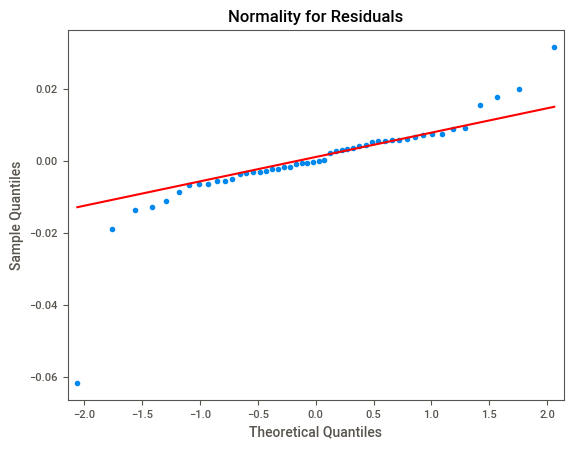

In [57]:
# Residual Plot for Homoscedasticity
qqplot4=sm.qqplot(model4.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

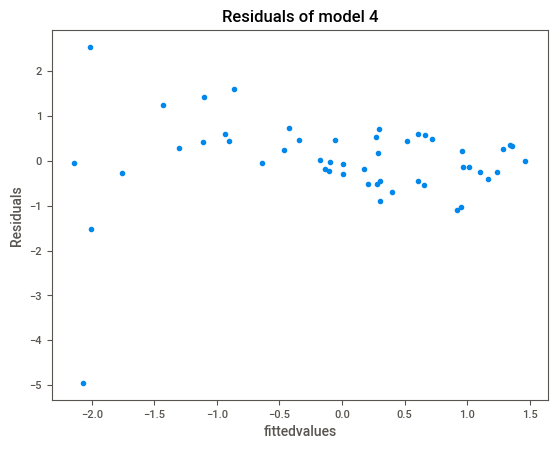

In [58]:

# Residuals Analysis
plt.scatter(get_standardized_values(model4.fittedvalues),
           get_standardized_values(model4.resid))
plt.title('Residuals of model 4')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

In [59]:
# RMSE- Root Mean Squared Error
from sklearn.metrics import mean_squared_error
import math
mse_m4= mean_squared_error(df_tanh.Profit,model4.fittedvalues) #checking for RMSE value 
rmse_m4=math.sqrt(mse_m4)
print("the difference between actual and predicted values of model4 is :---",rmse_m4)


the difference between actual and predicted values of model4 is :--- 0.012320535718157118


# Model 5 Creation by transforming dataset using inverse tan Transformation

In [60]:
df_arctan=np.arctan(strt1)
df_arctan.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,1.11,1.03,1.11,1.11,1.11
1,1.10,1.05,1.10,0.79,1.11
2,1.09,0.94,1.08,0.98,1.11
3,1.08,0.99,1.07,1.11,1.10
4,1.08,0.92,1.06,0.98,1.08


In [61]:
model5=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df_arctan).fit()


In [62]:
model5.params


Intercept          0.28
RD_Spend           0.68
Administration    -0.01
Marketing_Spend    0.07
State              0.01
dtype: float64

In [63]:
model5.tvalues, '\n',model5.pvalues


(Intercept          5.41
 RD_Spend          15.61
 Administration    -0.31
 Marketing_Spend    1.57
 State              0.43
 dtype: float64,
 '\n',
 Intercept         0.00
 RD_Spend          0.00
 Administration    0.76
 Marketing_Spend   0.12
 State             0.67
 dtype: float64)

In [64]:
model5.rsquared

0.9340572726630105

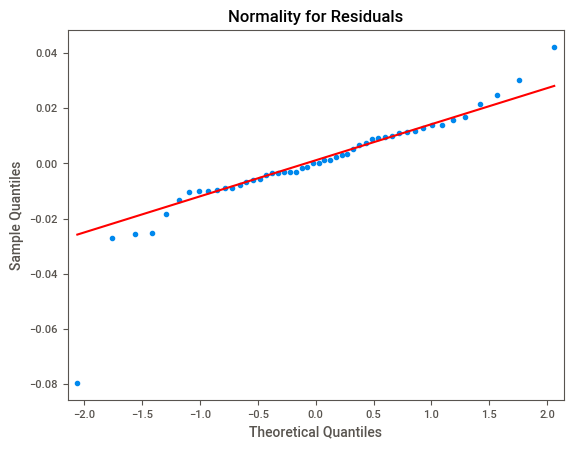

In [65]:
# Residual Plot for Homoscedasticity
qqplot5=sm.qqplot(model5.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

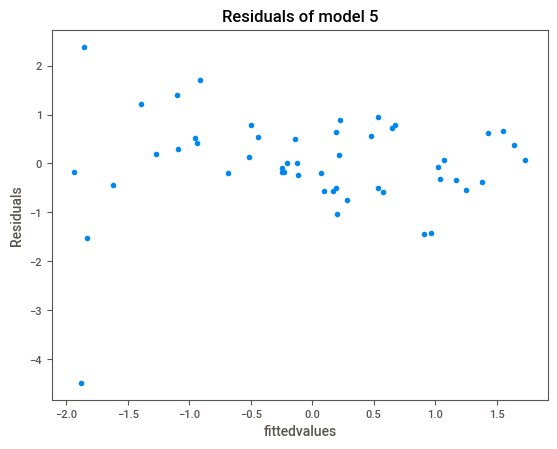

In [66]:
# Residuals Analysis
plt.scatter(get_standardized_values(model5.fittedvalues),
           get_standardized_values(model5.resid))
plt.title('Residuals of model 5')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()


In [67]:

# RMSE- Root Mean Squared Error
mse_m5= mean_squared_error(df_arctan.Profit,model5.fittedvalues) #checking for RMSE value 
rmse_m5=math.sqrt(mse_m5)
print("the difference between actual and predicted values of model5 is :---",rmse_m5)


the difference between actual and predicted values of model5 is :--- 0.017565506262495992


# Model 6 Creation by transforming dataset using log1p Transformation

In [68]:
df_log1p=np.log1p(strt1)
df_log1p.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,1.10,0.98,1.10,1.10,1.10
1,1.09,1.02,1.08,0.69,1.10
2,1.07,0.87,1.05,0.92,1.10
3,1.06,0.92,1.03,1.10,1.08
4,1.05,0.84,1.02,0.92,1.05


In [69]:
model6=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df_log1p).fit()


In [70]:
model6.params


Intercept          0.24
RD_Spend           0.72
Administration    -0.02
Marketing_Spend    0.07
State              0.00
dtype: float64

In [71]:
model6.tvalues, '\n',model6.pvalues


(Intercept          5.23
 RD_Spend          16.83
 Administration    -0.43
 Marketing_Spend    1.62
 State              0.19
 dtype: float64,
 '\n',
 Intercept         0.00
 RD_Spend          0.00
 Administration    0.67
 Marketing_Spend   0.11
 State             0.85
 dtype: float64)

In [72]:
model6.rsquared

0.9446722314288836

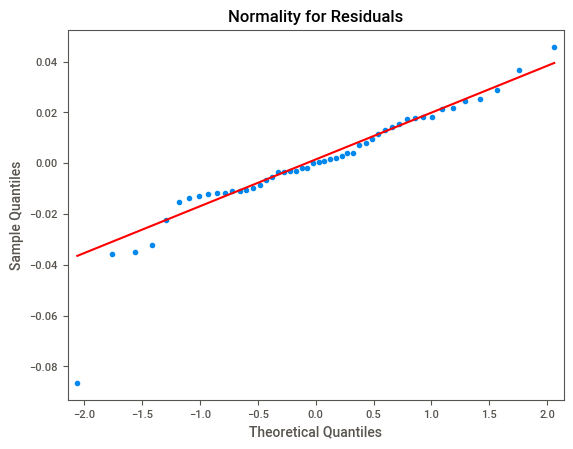

In [73]:
# Residual Plot for Homoscedasticity
qqplot6=sm.qqplot(model6.resid,line='q')
plt.title("Normality for Residuals")
plt.show()


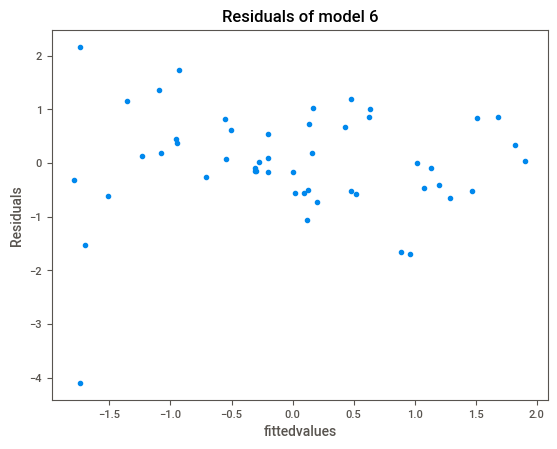

In [74]:
# Residuals Analysis
plt.scatter(get_standardized_values(model6.fittedvalues),
           get_standardized_values(model6.resid))
plt.title('Residuals of model 6')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

In [75]:
# RMSE- Root Mean Squared Error
mse_m6= mean_squared_error(df_log1p.Profit,model6.fittedvalues) #checking for RMSE value 
rmse_m6=math.sqrt(mse_m6)
print("the difference between actual and predicted values of model6 is :---",rmse_m6)

the difference between actual and predicted values of model6 is :--- 0.020916577340731518


# Model 7 Creation by transforming dataset using Cube Root Transformation

In [76]:
df_cbrt=np.cbrt(strt1)
df_cbrt.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,1.26,1.18,1.26,1.26,1.26
1,1.26,1.21,1.25,1.00,1.26
2,1.24,1.11,1.23,1.14,1.26
3,1.23,1.15,1.22,1.26,1.25
4,1.23,1.09,1.21,1.14,1.23


In [77]:
model7=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df_cbrt).fit()


In [78]:
model7.params


Intercept          0.28
RD_Spend           0.72
Administration    -0.02
Marketing_Spend    0.07
State              0.00
dtype: float64

In [79]:
model7.tvalues, '\n',model7.pvalues


(Intercept          4.88
 RD_Spend          16.69
 Administration    -0.42
 Marketing_Spend    1.61
 State              0.22
 dtype: float64,
 '\n',
 Intercept         0.00
 RD_Spend          0.00
 Administration    0.67
 Marketing_Spend   0.11
 State             0.83
 dtype: float64)

In [80]:
model7.rsquared

0.9436223042636447

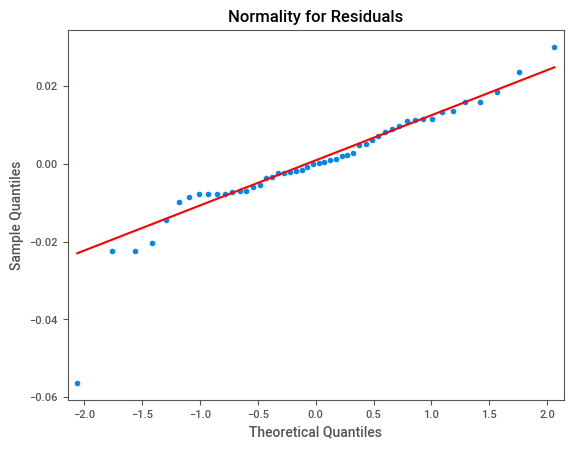

In [81]:
# Residual Plot for Homoscedasticity
qqplot7=sm.qqplot(model7.resid,line='q')
plt.title("Normality for Residuals")
plt.show()



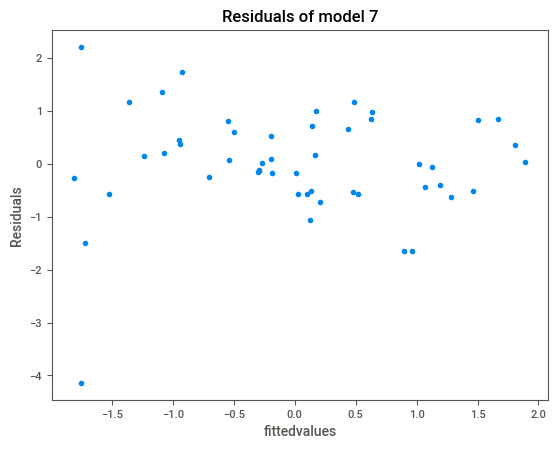

In [82]:
# Residuals Analysis
plt.scatter(get_standardized_values(model7.fittedvalues),
           get_standardized_values(model7.resid))
plt.title('Residuals of model 7')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()


In [83]:
# RMSE- Root Mean Squared Error
mse_m7= mean_squared_error(df_cbrt.Profit,model7.fittedvalues) #checking for RMSE value 
rmse_m7=math.sqrt(mse_m7)
print("the difference between actual and predicted values of model7 is :---",rmse_m7)


the difference between actual and predicted values of model7 is :--- 0.01346134793323825


# Model 8 Creation by transforming dataset using Square Root Transformation

In [84]:
df_sqrt=np.sqrt(strt1)
df_sqrt.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,1.41,1.29,1.41,1.41,1.41
1,1.41,1.33,1.39,1.00,1.41
2,1.39,1.17,1.37,1.22,1.41
3,1.37,1.23,1.35,1.41,1.40
4,1.36,1.14,1.33,1.22,1.36


In [85]:
model8=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df_sqrt).fit()


In [86]:
model8.params


Intercept          0.31
RD_Spend           0.73
Administration    -0.02
Marketing_Spend    0.07
State              0.00
dtype: float64

In [87]:
model8.tvalues, '\n',model8.pvalues


(Intercept          4.98
 RD_Spend          16.95
 Administration    -0.45
 Marketing_Spend    1.62
 State              0.16
 dtype: float64,
 '\n',
 Intercept         0.00
 RD_Spend          0.00
 Administration    0.66
 Marketing_Spend   0.11
 State             0.87
 dtype: float64)

In [88]:
model8.rsquared

0.9456584193907838

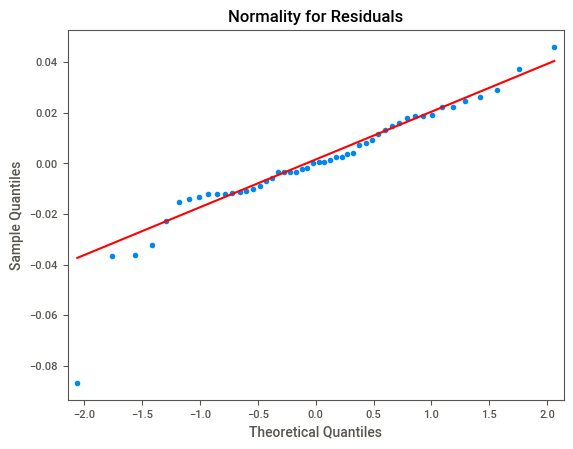

In [89]:
# Residual Plot for Homoscedasticity
qqplot8=sm.qqplot(model8.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

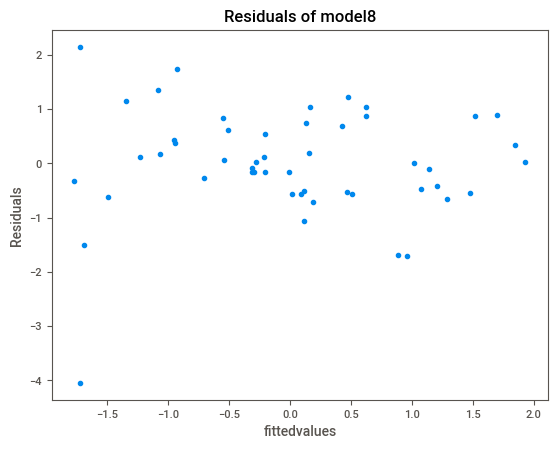

In [90]:
# Residuals Analysis
plt.scatter(get_standardized_values(model8.fittedvalues),
           get_standardized_values(model8.resid))
plt.title('Residuals of model8')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()


In [91]:
# RMSE- Root Mean Squared Error
mse_m8= mean_squared_error(df_sqrt.Profit,model8.fittedvalues) #checking for RMSE value 
rmse_m8=math.sqrt(mse_m8)
print("the difference between actual and predicted values of model8 is :---",rmse_m8)


the difference between actual and predicted values of model8 is :--- 0.021224384343862014


# Model 9 Creation by transforming dataset using BOX-COX Transformation

In [92]:
strt.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


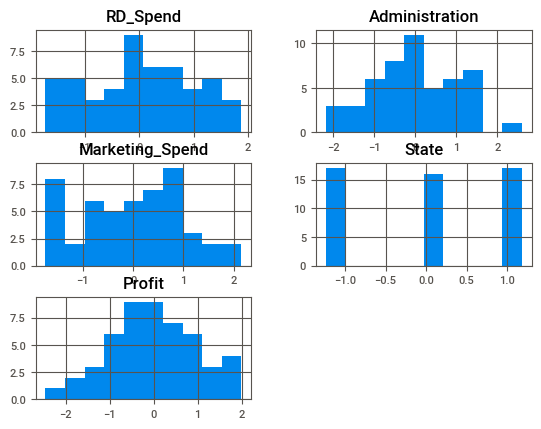

In [93]:
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
power=PowerTransformer(method='box-cox')
pipeline=Pipeline(steps=[('s',scaler),('p',power)])
columns=strt.columns
data=pipeline.fit_transform(strt)
#converting array to Dataframe
df_boxcox=pd.DataFrame(data,columns=columns)
df_boxcox.hist()
plt.show()

In [94]:
model9=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df_boxcox).fit()


In [95]:
model9.params


Intercept         -0.00
RD_Spend           0.91
Administration    -0.03
Marketing_Spend    0.09
State              0.00
dtype: float64

In [96]:
model9.tvalues, '\n',model9.pvalues


(Intercept         -0.00
 RD_Spend          17.66
 Administration    -0.70
 Marketing_Spend    1.75
 State              0.05
 dtype: float64,
 '\n',
 Intercept         1.00
 RD_Spend          0.00
 Administration    0.49
 Marketing_Spend   0.09
 State             0.96
 dtype: float64)

In [97]:
model9.rsquared

0.9509122298023632

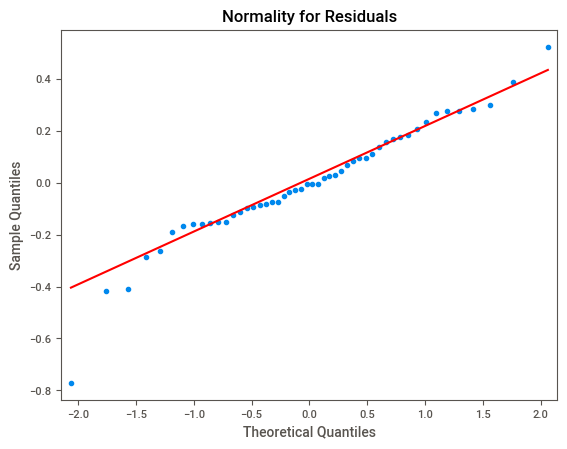

In [98]:
# Residual Plot for Homoscedasticity
qqplot9=sm.qqplot(model9.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

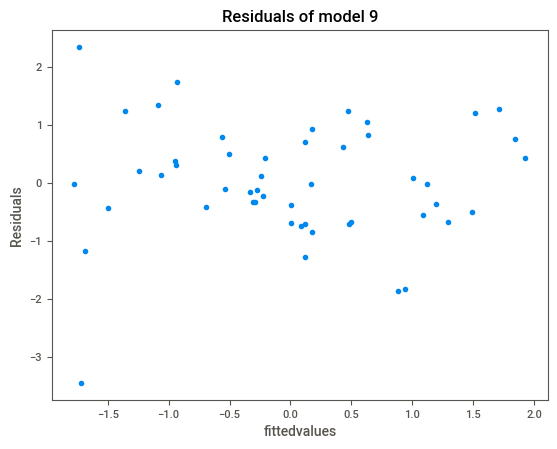

In [99]:
# Residuals Analysis
plt.scatter(get_standardized_values(model9.fittedvalues),
           get_standardized_values(model9.resid))
plt.title('Residuals of model 9')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

In [100]:

# RMSE- Root Mean Squared Error
mse_m9= mean_squared_error(df_boxcox.Profit,model9.fittedvalues) #checking for RMSE value 
rmse_m9=math.sqrt(mse_m9)
print("the difference between actual and predicted values of model9 is :---",rmse_m9)


the difference between actual and predicted values of model9 is :--- 0.22155760018026188


# Model 10 Creation by transforming dataset using YEO-Johnson Transformation

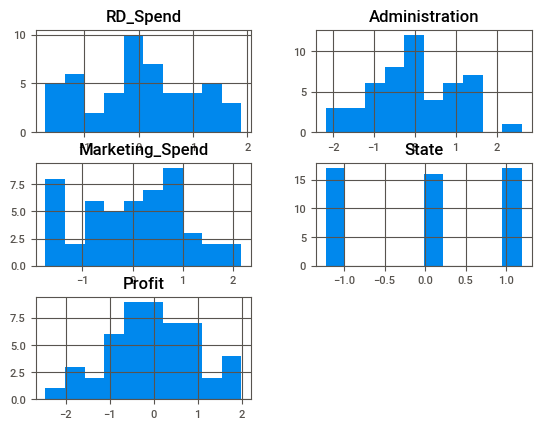

In [101]:
power2=PowerTransformer(method='yeo-johnson')
pipeline=Pipeline(steps=[('s',scaler),('p',power2)])
data2=pipeline.fit_transform(strt)
#converting array to Dataframe
df_yeo_john=pd.DataFrame(data2,columns=columns)
df_yeo_john.hist()
plt.show()

In [102]:
model10=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df_yeo_john).fit()
model10.params
model10.tvalues, '\n',model10.pvalues
model10.rsquared

0.9509390236095304

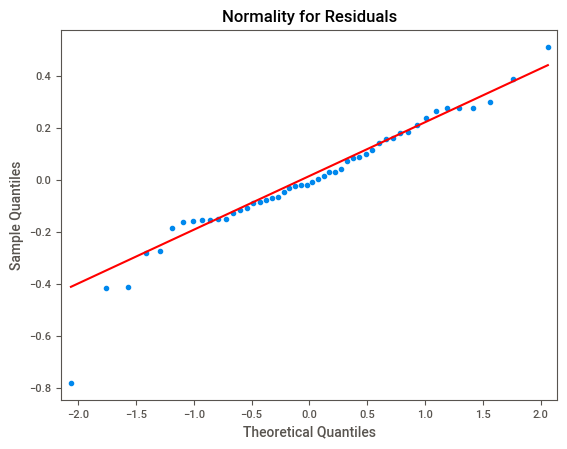

In [103]:
# Residual Plot for Homoscedasticity
qqplot10=sm.qqplot(model10.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

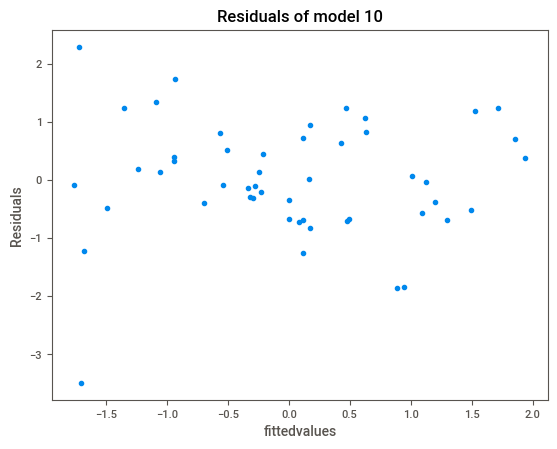

In [104]:
# Residuals Analysis
plt.scatter(get_standardized_values(model10.fittedvalues),
           get_standardized_values(model10.resid))
plt.title('Residuals of model 10')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

In [105]:
# RMSE- Root Mean Squared Error
mse_m10= mean_squared_error(df_yeo_john.Profit,model10.fittedvalues) #checking for RMSE value 
rmse_m10=math.sqrt(mse_m10)
print("the difference between actual and predicted values of model10 is :---",rmse_m10)

the difference between actual and predicted values of model10 is :--- 0.22149712501626193


In [106]:
from tabulate import tabulate

In [107]:
#Creating Table to compare all model's Rsquared(model validation accuracy),AIC(Akaik Information Criteria <<< for Good Model),BIC(Bayesian Info Criteria<<< for Good Model)
table=[['Model no.','R-Squared','Adj R-Squared','AIC','BIC','RMSE_Value','Transformation of Dataset'],
       ['Model 1',model.rsquared,model.rsquared_adj,model.aic,model.bic,rmse_m1,'Checking p_value for each column in next model'],
       ['Model 2',model2.rsquared,model2.rsquared_adj,model2.aic,model2.bic,rmse_m2,' Removing Sate Column because its p_value is>0.05'],
       ['Model 3',model3.rsquared,model3.rsquared_adj,model3.aic,model3.bic,rmse_m3,'Removing Adminidtration Column because its p_value was >0.05 in model1,model2 also'],
       ['Model 4',model4.rsquared,model4.rsquared_adj,model4.aic,model4.bic,rmse_m4,'Hyperbolic Tan Transformation'],
       ['Model 5',model5.rsquared,model5.rsquared_adj,model5.aic,model5.bic,rmse_m5,'Inverse Tan Transformation'],
       ['Model 6',model6.rsquared,model6.rsquared_adj,model6.aic,model6.bic,rmse_m6,'log1p Transformation'],
       ['Model 7',model7.rsquared,model7.rsquared_adj,model7.aic,model7.bic,rmse_m7,'Cube Root Transformation'],
       ['Model 8',model8.rsquared,model8.rsquared_adj,model8.aic,model8.bic,rmse_m8,'Square Root Transformation'],
       ['Model 9',model9.rsquared,model9.rsquared_adj,model9.aic,model9.bic,rmse_m9,'BoX-CoX Transformation'],
       ['Model 10',model10.rsquared,model10.rsquared_adj,model10.aic,model10.bic,rmse_m10,'BoX-CoX Transformation']]

In [108]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', showindex=range(1,11)))

╒════╤═════════════╤═════════════╤═════════════════╤════════════╤═══════════╤══════════════╤════════════════════════════════════════════════════════════════════════════════════╕
│    │ Model no.   │   R-Squared │   Adj R-Squared │        AIC │       BIC │   RMSE_Value │ Transformation of Dataset                                                          │
╞════╪═════════════╪═════════════╪═════════════════╪════════════╪═══════════╪══════════════╪════════════════════════════════════════════════════════════════════════════════════╡
│  1 │ Model 1     │    0.950746 │        0.946368 │ -147.947   │ -138.386  │    0.0498666 │ Checking p_value for each column in next model                                     │
├────┼─────────────┼─────────────┼─────────────────┼────────────┼───────────┼──────────────┼────────────────────────────────────────────────────────────────────────────────────┤
│  2 │ Model 2     │    0.950746 │        0.947534 │ -149.946   │ -142.298  │    0.0498667 │ Removing Sate Col

# Here after this Table Evaluation we can Select Model4 Hyperbolic tan has the lowest RMSE Value =0.01232 with adj_rsquared=0.90 while Model7 Rmse_value is=0.01346 with adj_Rsuared=0.93 , So we can choose Model7 Cube Root Transformation as the best model because with low rmse value its accuracy is 93%

In [109]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     114.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           5.30e-23
Time:                        02:24:49   Log-Likelihood:                 148.88
No. Observations:                  50   AIC:                            -287.8
Df Residuals:                      45   BIC:                            -278.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2879      0.051      5.668      0.000       0.186       0.390
RD_Spend            0.6275      0.046     13.598      0.000       0.535       0.720
Administration     -0.0068      0.046     -0.146      0.885      -0.100       0.087
Marketing_Spend     0.0646      0.045      1.424      0.161      -0.027       0.156
State               0.0157      0.022      0.729      0.470      -0.028       0.059
==============================================================================
Omnibus:                       45.302   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.777
Skew:                          -2.096   Prob(JB):                     2.39e-62
Kurtosis:                      13.892   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Lets Check Best algorithm with Model7 Cube Root Transformation Dataset using Lazypredict

In [110]:
from lazypredict.Supervised import LazyRegressor
reg=LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
X=df_cbrt.iloc[:,:-1]
Y=df_cbrt.iloc[:,-1:]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)
models2,predictions2=reg.fit(x_train,x_test,y_train,y_test)
print(models2)

100%|██████████| 42/42 [00:01<00:00, 28.23it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.95       0.96  0.01        0.14
ExtraTreeRegressor                           0.94       0.96  0.01        0.01
DecisionTreeRegressor                        0.92       0.94  0.01        0.01
RandomForestRegressor                        0.91       0.93  0.01        0.16
LassoLarsIC                                  0.90       0.93  0.01        0.01
OrthogonalMatchingPursuitCV                  0.90       0.92  0.01        0.02
OrthogonalMatchingPursuit                    0.88       0.91  0.01        0.02
GradientBoostingRegressor                    0.88       0.91  0.01        0.04
AdaBoostRegressor                            0.88       0.91  0.01        0.10
HuberRegressor                               0.88       0.91  0.01        0.03
LassoCV                                      0.87   

# Here we can see that Best Algorithm has Changed from ElasticNetCV to ExtraTrees Algorithm and there is improvement in accuracy from adj_rsquare= 0.92 to 0.95

### Lets Check Best Algorithm without the Columns which have >0.05 p_value which dont impact much on Target Variable

In [111]:
df_cbrt.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [112]:
X=df_cbrt.iloc[:,:1]
Y=df_cbrt.iloc[:,-1:]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)
reg=LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
models3,predictions3=reg.fit(x_train,x_test,y_train,y_test)
print(models3)

 64%|██████▍   | 27/42 [00:00<00:00, 28.95it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(33, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.


100%|██████████| 42/42 [00:01<00:00, 28.88it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
NuSVR                                        0.94       0.95  0.01        0.02
GaussianProcessRegressor                     0.93       0.94  0.01        0.02
RANSACRegressor                              0.92       0.92  0.01        0.03
KNeighborsRegressor                          0.92       0.92  0.01        0.03
Ridge                                        0.91       0.92  0.01        0.01
HuberRegressor                               0.91       0.92  0.01        0.04
RidgeCV                                      0.91       0.91  0.01        0.02
BayesianRidge                                0.91       0.91  0.01        0.01
ElasticNetCV                                 0.91       0.91  0.01        0.08
LassoCV                                      0.91       0.91  0.01        0.07
LarsCV                                       0.91   

## After removing the columns and checking with only RD_Spend we get to know that the Best Algorithm now is NuSVR and there is a dip in Accuracy that is adj_rsquared=0.94 previously 0.95 using Extratrees Algorithm and all columns , we might need all different Columns in Real Life Projects even if they don't impact the Target Variable